**Data Science Engineering Methods and Tools**

**Assignment 2** **-** **KAGGLE**

**Name** - **Ronak Bhushan Patil**

**NUID** - **001007035**

**Abstract**

The Movie Databse also known as TMDB is a community built movie and TV database. The aim of the notebook is to predict the target variable revenue of the movies listed in the TMDB database. We have ran the models and tried to predict the revenue of the movies.

### **THE  MOVIE  DATABASE**







                    
![](https://cdn-images-1.medium.com/max/1200/1*vIR7iO-1GnY2xYxL6NiYkw.png)

**Following is the detailed description of the columns in my dataset**

**Data Description**

**id** - Integer unique id of each movie

**belongs_to_collection** - Contains the TMDB Id, Name, Movie Poster and Backdrop URL  of a movie in JSON format. You can see the Poster and Backdrop 

**budget**:Budget of a movie in dollars. 0 values mean unknown. 

**genres** : Contains all the Genres Name & TMDB Id in JSON Format

**homepage** - Contains the official homepage URL of a movie.

**imdb_id** - IMDB id of a movie (string). 

**original_language** - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french. 

**original_title** - The original title of a movie. Title & Original title may differ, if the original title is not in English. 

**overview** - Brief description of the movie.

**popularity** -  Popularity of the movie in float. 

**poster_path** - Poster path of a movie.

**production_companies** - All production company name and TMDB id in JSON format of a movie.

**production_countries** - Two digit code and full name of the production company in JSON format.

**release_date** - Release date of a movie in mm/dd/yy format.

**runtime** - Total runtime of a movie in minutes (Integer).

**spoken_languages** - Two digit code and full name of the spoken language. 

**status** - Is the movie released or rumored? 

**tagline** - Tagline of a movie 

**title** - English title of a movie

**Keywords** - TMDB Id and name of all the keywords in JSON format. 

**cast** - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

**crew** - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc. 

**revenue** - Total revenue earned by a movie in dollars. 

### **Importing all necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fast')
!pip install missingno
import missingno as msngno 
%matplotlib inline
import ast
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### **Uploading and Reading the Dataset**

**Ratings, Total Votes, imdb_id and popularity2 column has been added as the Additional Features in both**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')
train_extra = pd.read_csv('/content/drive/MyDrive/Dataset/TrainAdditionalFeatures.csv')
test_extra = pd.read_csv('/content/drive/MyDrive/Dataset/TestAdditionalFeatures.csv')

train = pd.merge(train, train_extra, how='left', on=['imdb_id'])
test = pd.merge(test, test_extra, how='left', on=['imdb_id'])



**Loading the dataset, Train and Test
I have also added additional features from an external source (both test and train)**

**Note: When the data is in the local machine, it is easier to load. The data was however loaded through GitHub link and it might take a while :)**


# **Data Preprocessing and Cleaning**

**The Train dataset has 3000 observations in it and 26 columns which is a mix between categorical and numeric values.**

**The Test dataset has 4398 observations in it and 25 columns which is a mix between categorical and numeric values.**

In [ ]:
train.shape, test.shape

((3000, 26), (4398, 25))

**The Additional Train dataset has 2887 observations in it and 4 columns which is a mix between categorical and numeric values.**

**The Additional Test dataset has 4398 observations in it and 25 columns which is a mix between categorical and numeric values.**

In [ ]:
train_extra.shape, test_extra.shape

((2887, 4), (4232, 4))

In [ ]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,26.082,8.4,7314.0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,5.531,7.5,115.0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN,NaN,NaN


In [ ]:
sum(train.duplicated()), sum(test.duplicated())

(0, 0)

**Checking the duplicates**

**Fixing the values that were missing/wrong for the complete dataset
These were pre-released in the discussion section**

In [ ]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000


test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

**These are the predefined values for the null values in budget column**

**These values has been added as per the discussion in the competition**

In [ ]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

**Checking for null values for both train and test dataset**

In [ ]:
test.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
popularity2               179
rating                    179
totalVotes                179
dtype: int64

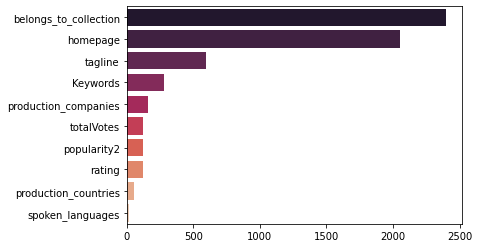

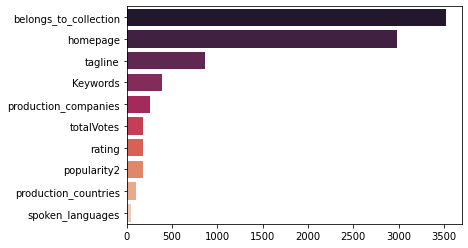

In [ ]:
missing_values=train.isna().sum().sort_values(ascending=False)
sns.barplot(missing_values[:10],missing_values[:10].index,palette="rocket")
plt.show()

missing_values1=test.isna().sum().sort_values(ascending=False)
sns.barplot(missing_values1[:10],missing_values1[:10].index,palette="rocket")
plt.show()

**Missing values has been plotted to get a clear picture of how many variables have missing values**

In [ ]:
train.describe()

,id,budget,homepage,popularity,runtime,revenue,rating,totalVotes,release_year,release_month,release_day,numberofgenres,lang_english,bud_runtime,bud_year,bud_popularity,runtime_year,popularity_year
count,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2.840000e+03,2840.000000,2.840000e+03,2840.000000,2840.000000
mean,1499.569014,11.990195,0.332042,8.573721,107.309054,16.031640,6.322239,966.016549,2002.297535,6.742958,3.305634,2.502113,0.855634,2.201377e+05,11836.425060,2.391353e+06,0.054065,0.004775
std,868.290215,7.471043,0.471029,12.390547,21.249041,3.018458,0.853994,1798.452339,10.802619,3.400079,1.276044,1.117599,0.351523,4.211415e+05,18779.709030,4.253962e+06,0.010598,0.006147
min,1.000000,0.000000,0.000000,0.000001,0.000000,0.693147,1.000000,1.000000,1971.000000,1.000000,0.000000,0.000000,0.000000,5.291005e-03,0.000496,2.598444e-02,0.000496,0.000500
25%,752.750000,0.000000,0.000000,4.133600,94.000000,14.714884,5.800000,90.000000,1995.000000,4.000000,3.000000,2.000000,1.000000,1.190476e-02,0.000504,7.030674e-01,0.047619,0.002564
50%,1500.500000,16.072038,0.000000,7.428286,104.000000,16.704229,6.366308,337.000000,2005.000000,7.000000,4.000000,2.000000,1.000000,8.910892e+04,4742.961828,1.134663e+06,0.052369,0.004215
75%,2255.250000,17.216708,1.000000,10.940463,117.000000,18.108662,6.900000,934.000000,2011.000000,10.000000,4.000000,3.000000,1.000000,2.806687e+05,14977.534199,3.306451e+06,0.059028,0.005956
max,3000.000000,19.755682,1.000000,294.337037,338.000000,21.141685,9.000000,18931.000000,2017.000000,12.000000,6.000000,7.000000,1.000000,1.100000e+07,188866.799702,1.124231e+08,0.168573,0.146351


**Here we can see the min rating of the movie is 1 and the maximum rating any movie have got is 9**

**The minimum total votes any movie has got is 1 whereas the maximum votes any movie has got is 18931**

**It only describes about the numerical columns present in the dataset, but there are many dictionary columns too which we are going to see ahead**

In [ ]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

**Here we are converting various columns which are in JSON format in to dictionary**

In [ ]:
for count,value in enumerate(train['belongs_to_collection'][:2]):
    print(count,value)

for count,value in enumerate(test['genres'][:2]):
    print(count,value)
    
for count,value in enumerate(train['genres'][:2]):
    print(count,value)
    
for count,value in enumerate(train['spoken_languages'][:2]):
    print(count,value)
    
for count,value in enumerate(train['Keywords'][:2]):
    print(count,value)
    
for count,value in enumerate(train['production_countries'][:2]):
    print(count,value)
    
for count,value in enumerate(train['production_companies'][:2]):
    print(count,value)
    
for count,value in enumerate(train['cast'][:2]):
    print(count,value)
    
for count,value in enumerate(train['crew'][:2]):
    print(count,value)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
0 [{'id': 12, 'name': 'Adventure'}, {'id': 16, 'name': 'Animation'}, {'id': 10751, 'name': 'Family'}, {'id': 14, 'name': 'Fantasy'}]
1 [{'id': 27, 'name': 'Horror'}, {'id': 878, 'name': 'Science Fiction'}]
0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 

**Displaying different values in the columns which are in JSON format to have a detailed view about each column and values**


### **Feature Engineering**

In [ ]:
train['release_year']=pd.to_datetime(train['release_date']).dt.year
train['release_month']=pd.to_datetime(train['release_date']).dt.month
train['release_day']=pd.to_datetime(train['release_date']).dt.dayofweek


test['release_year']=pd.to_datetime(test['release_date']).dt.year
test['release_month']=pd.to_datetime(test['release_date']).dt.month
test['release_day']=pd.to_datetime(test['release_date']).dt.dayofweek


**The release date column was in unstructured format to have any relation and analyse the data.Here we have dissolved the column in three seperate columns giving the year,month and day respectively.**

In [ ]:
train['rating']=train['rating'].fillna(train['rating'].mean())
test['rating']=test['rating'].fillna(test['rating'].mean())

train['totalVotes']=train['totalVotes'].fillna(train['totalVotes'].mean())
train['totalVotes']=train['totalVotes'].round()
test['totalVotes']=test['totalVotes'].fillna(test['totalVotes'].mean())
test['totalVotes']=test['totalVotes'].round()

train['runtime']=train['runtime'].fillna(train['runtime'].mean())
test['runtime']=test['runtime'].fillna(test['runtime'].mean())

**Imputing the missing values for Rating, TotalVotes, and Runtime by the average values in the dataset**

**NOTE: The votes can't be in decimal hence I have rounded it upto the nearest integer.**

In [ ]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,release_year,release_month,release_day
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.000000,482.0,2015,2,4
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.400000,1528.0,2004,8,4
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,26.082,8.400000,7314.0,2014,10,4
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,5.531,7.500000,115.0,2012,3,4
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN,6.366308,934.0,2009,2,3


In [ ]:
train['numberofgenres']=train['genres'].apply(lambda x: len(x) if x != {} else 0)
train['nameofcollection'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['genres_info'] = train['genres'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['language'] = train['spoken_languages'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['production_country'] = train['production_countries'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['production_company'] = train['production_companies'].apply(lambda x: x[0]['name'] if x != {} else 0)

In [ ]:
test['numberofgenres']=train['genres'].apply(lambda x: len(x) if x != {} else 0)
test['numberofgenres']=test['numberofgenres'].replace(np.nan,0)
test['nameofcollection'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['genres_info'] = test['genres'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['language'] = test['spoken_languages'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['production_country'] = test['production_countries'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['production_company'] = test['production_companies'].apply(lambda x: x[0]['name'] if x != {} else 0)

**Extracting the required data from the converted dictionary columns**

**Feature Engineering of some columns have been added to get the total number of genres in a movie, name of the collection and other feature engineering columns**

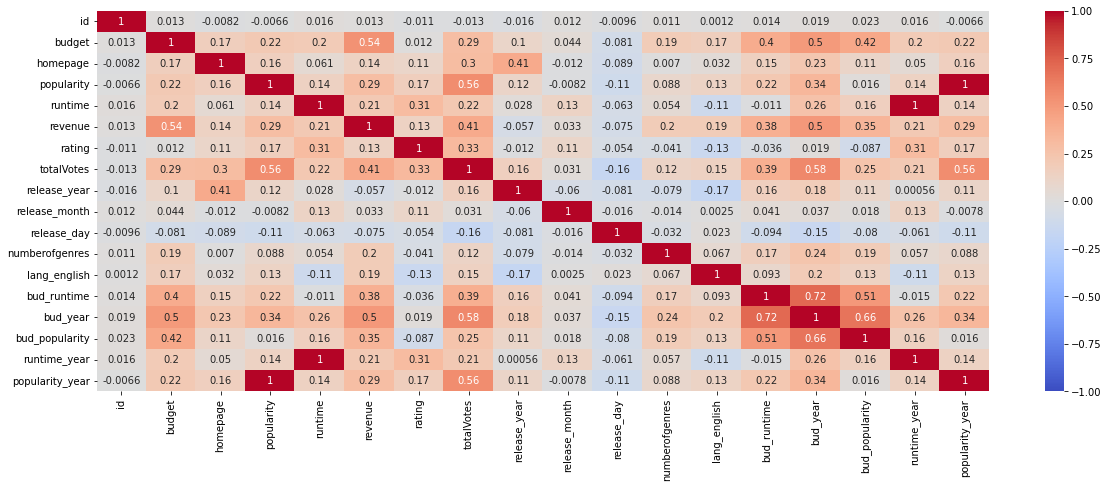

In [ ]:
corr = train.corr()
ax , fig  = plt.subplots(figsize =(20,7))
sns.heatmap(corr ,vmin = -1 , cmap='coolwarm', annot = True)
plt.show()

**We can see that the highest correlated variable is budget to the target variable**

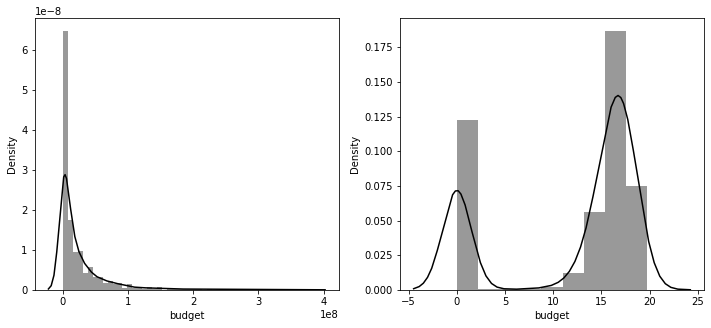

In [ ]:
train = train.astype({"budget":'Int32',})
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.distplot(train['budget'],ax=ax[0],color='black')
sns.distplot(np.log1p(train['budget']),ax=ax[1],color='black')


**Checking the skewness of the Budget column which seems to be highly correlated to the target variable**

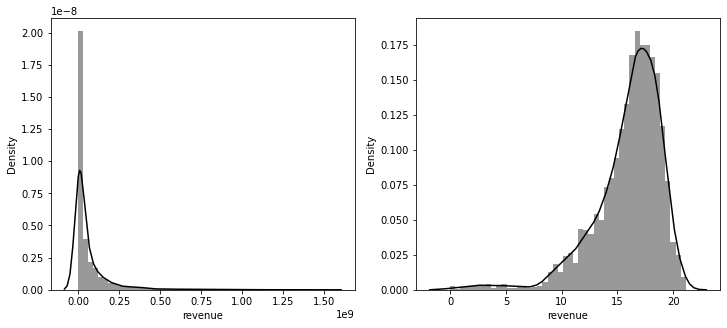

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.distplot(train['revenue'],ax=ax[0],color='black')
sns.distplot(np.log(train['revenue']),ax=ax[1],color='black')


**Checking the skewness of the target variable "Revenue"**

In [ ]:
train['lang_english']=0
train.loc[train['original_language'].astype(str)=="en","lang_english"]=1

train['bud_runtime']=(train['budget']+1)/(train['runtime']+1)

train['bud_year']=(train['budget']+1)/(train['release_year']+1)

train['bud_popularity']=(train['budget']+1)/(train['popularity']+1)

train['runtime_year']=(train['runtime']+1)/(train['release_year']+1)

train['popularity_year']=(train['popularity']+1)/(train['release_year']+1)

In [ ]:
test['lang_english']=0
test.loc[test['original_language'].astype(str)=="en","lang_english"]=1

test['bud_runtime']=(test['budget']+1)/(test['runtime']+1)

test['bud_year']=(test['budget']+1)/(test['release_year']+1)

test['bud_popularity']=(test['budget']+1)/(test['popularity']+1)

test['runtime_year']=(test['runtime']+1)/(test['release_year']+1)

test['popularity_year']=(test['popularity']+1)/(test['release_year']+1)

**Feature Engineering some other numerical columns w.r.t the highest correlated variable i.e. budget and runtime and popularity(Test and Train)**

In [ ]:
train['homepage'] = train['homepage'].fillna(0)
train['homepage'] = train['homepage'].apply(lambda x: 0 if x==0 else 1)

train['overview'] = train['overview'].fillna(0)
train['overview'] = train['overview'].apply(lambda x: 0 if x==0 else 1)

train['poster_path'] = train['poster_path'].fillna(0)
train['poster_path'] = train['poster_path'].apply(lambda x: 0 if x==0 else 1)

train['tagline'] = train['tagline'].fillna(0)
train['tagline'] = train['tagline'].apply(lambda x: 0 if x==0 else 1)


In [ ]:
test['homepage'] = test['homepage'].fillna(0)
test['homepage'] = test['homepage'].apply(lambda x: 0 if x==0 else 1)

test['overview'] = test['overview'].fillna(0)
test['overview'] = test['overview'].apply(lambda x: 0 if x==0 else 1)

test['poster_path'] = test['overview'].fillna(0)
test['poster_path'] = test['poster_path'].apply(lambda x: 0 if x==0 else 1)

test['tagline'] = test['tagline'].fillna(0)
test['tagline'] = test['tagline'].apply(lambda x: 0 if x==0 else 1)

**Encoding of some dictionary columns into 0 and 1 such that if there is any null values it should be filled as 0 else it should be set as 1 (Train and Test)**

In [ ]:
train.isna().sum()

id                         0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
production_companies       0
production_countries       0
release_date               0
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title                      0
Keywords                   0
cast                       0
crew                       0
revenue                    0
popularity2              118
rating                     0
totalVotes                 0
release_year               0
release_month              0
release_day                0
numberofgenres             0
nameofcollection           0
genres_info                0
language                   0
production_country         0
production_com

In [ ]:
test.isna().sum()

id                         0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
production_companies       0
production_countries       0
release_date               1
runtime                    0
spoken_languages           0
status                     2
tagline                    0
title                      3
Keywords                   0
cast                       0
crew                       0
popularity2              179
rating                     0
totalVotes                 0
release_year               1
release_month              1
release_day                1
numberofgenres             0
nameofcollection           0
genres_info                0
language                   0
production_country         0
production_company         0
lang_english  

**There were few missing values in the test as seen above in the dates section**

In [ ]:
test['release_year']=test['release_year'].fillna(test['release_year'].mode()[0])
test['release_month']=test['release_month'].fillna(test['release_month'].mode()[0])
test['release_day']=test['release_day'].fillna(test['release_day'].mode()[0])

test['bud_year']=test['bud_year'].fillna(test['bud_year'].mean())

test['popularity_year']=test['popularity_year'].fillna(test['popularity_year'].mean())

test['runtime_year']=test['runtime_year'].fillna(test['runtime_year'].mean())

**Imputing year,month and day by the Mode and the continuous variables by the Mean**

Text(0.5, 1.0, 'Release Year vs Revenue')

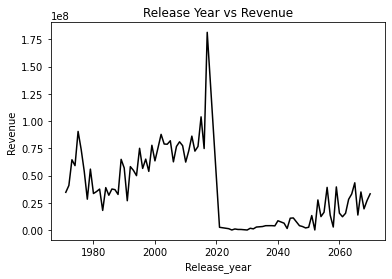

In [ ]:
train.groupby('release_year')['revenue'].mean().plot(color='black')
plt.xlabel('Release_year',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10);
plt.title("Release Year vs Revenue")

**Release Year VS Revenue**

**Just to check does the revenue got increased as per the time period**

**We have revenue for the movies upto 2060!!**

In [ ]:
train =train.loc[(train['release_year']<=2020)]

Text(0.5, 1.0, 'Release Year vs Revenue')

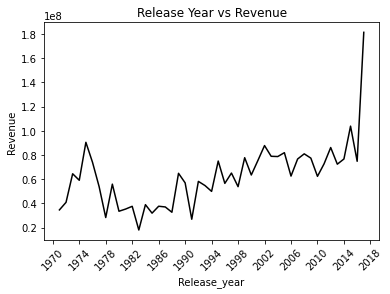

In [ ]:
train.groupby('release_year')['revenue'].mean().plot(color='black')
plt.xticks(np.arange(1970,2020,4),rotation=45)
plt.xlabel('Release_year',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10);
plt.title("Release Year vs Revenue")

**Checking how the release year affects the revenue for the movies before 2020**

Text(0.5, 1.0, 'Release Month vs Revenue')

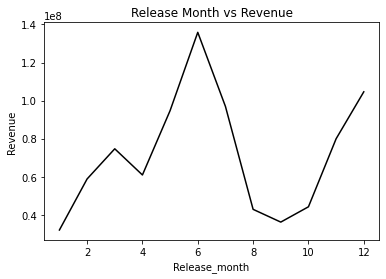

In [ ]:
train.groupby('release_month')['revenue'].mean().plot(color='black')
plt.xlabel('Release_month',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.title("Release Month vs Revenue")

**Release Month VS Revenue**

**Checking how the release month affects the revenue**

Text(0.5, 1.0, 'Release Day vs Revenue')

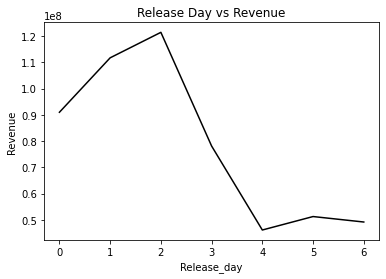

In [ ]:
train.groupby('release_day')['revenue'].mean().plot(color='black')
plt.xlabel('Release_day',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.title("Release Day vs Revenue")

**Release Day VS Revenue**

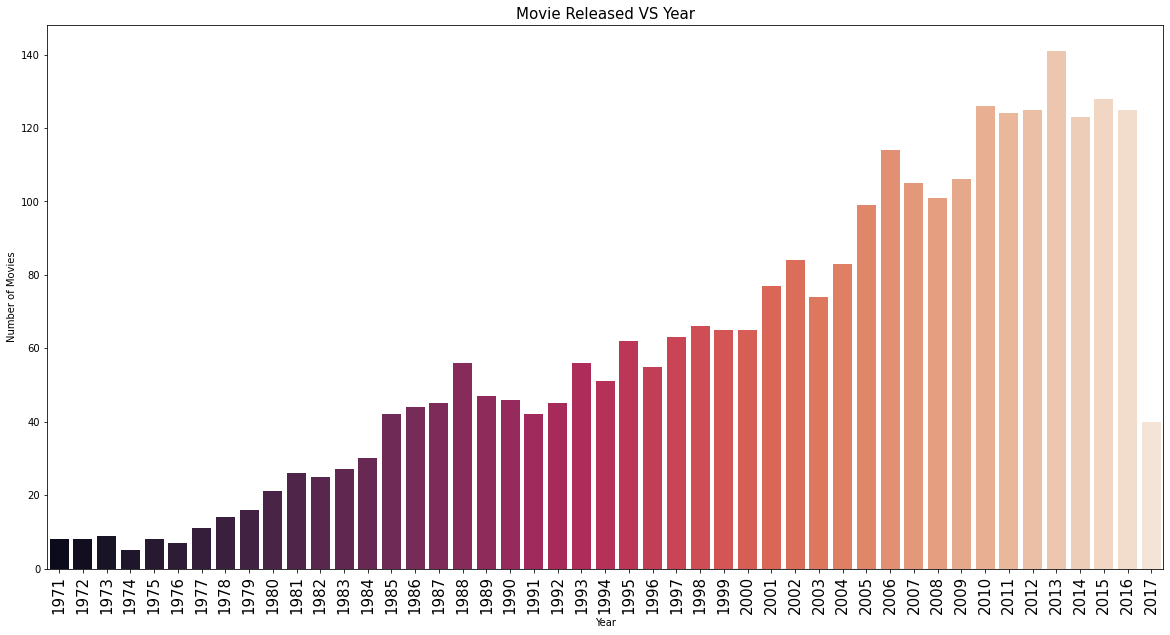

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='release_year',data=train,palette="rocket")
plt.title("Movie Released VS Year",fontsize=15)
loc, labels = plt.xticks()
plt.xlabel('Year',fontsize = 10)
plt.ylabel('Number of Movies',fontsize = 10)
plt.xticks(fontsize=15,rotation='vertical')
plt.show()

**Movie Released VS Year**

**We can get the number of movie released according to the respective years**

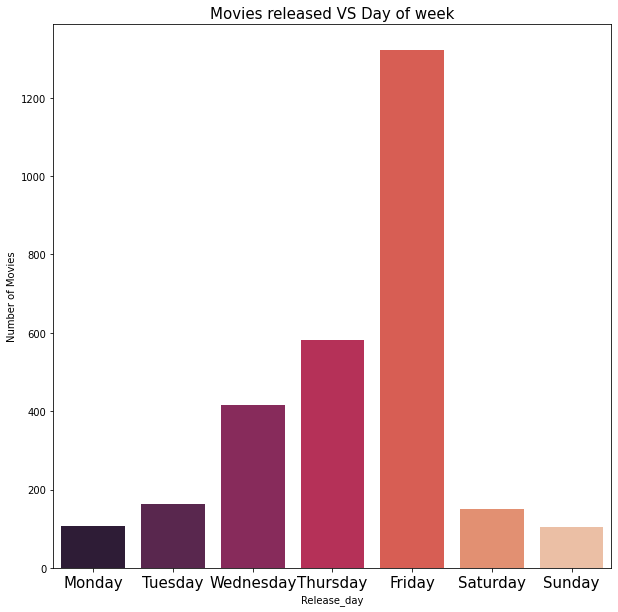

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='release_day',data=train,palette="rocket")
loc, labels = plt.xticks()
loc, labels = loc, ['Monday','Tuesday','Wednesday','Thursday',"Friday","Saturday","Sunday"]
plt.xticks(loc, labels,fontsize=15)
plt.xlabel('Release_day',fontsize = 10)
plt.ylabel('Number of Movies',fontsize = 10)
plt.title("Movies released VS Day of week",fontsize=15)
plt.show()

**Movie Released VS Day of week**

**We can see that the amount of movies released on Friday are more, since people are more tend to come due to weekends**

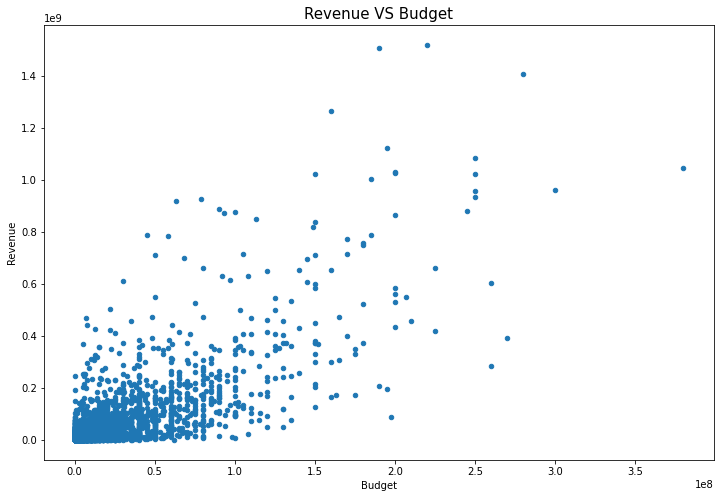

In [ ]:
train[['budget','revenue']].plot(kind='scatter',x='budget',y='revenue',figsize=(12,8))
plt.title("Revenue VS Budget",fontsize=15)
plt.xlabel('Budget',fontsize = 10)
plt.ylabel('Revenue',fontsize = 10)
plt.show()

**Revenue VS Budget**

**Here we can see as the budget of the movie increases the revenue of the movie also increases**

<Figure size 720x360 with 0 Axes>

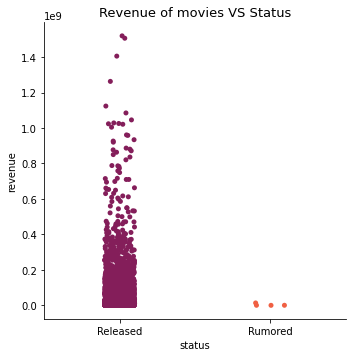

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='status', y='revenue', data=train,palette='rocket')
plt.title('Revenue of movies VS Status',fontsize=13);
plt.show()

**Revenue of movies VS Status**

**There are some movies which are not released yet**

In [ ]:
train = train.drop(['belongs_to_collection','genres','production_companies','nameofcollection','imdb_id','overview','poster_path','tagline','original_title','original_language','release_date','language','production_countries','cast','spoken_languages',
                    'Keywords', 'status','genres_info','production_company','production_country','title','crew','popularity2'], axis=1)

test = test.drop(['belongs_to_collection','genres','production_companies','nameofcollection','imdb_id','overview','poster_path','tagline','original_title','original_language','release_date','language','production_countries','cast','spoken_languages',
                    'Keywords', 'status','genres_info','production_company','production_country','title','crew','popularity2'], axis=1)


**Dropping down the columns which have been feature engineered above**

In [ ]:
test['budget']=np.log1p(test['budget'])
train['budget']=np.log1p(train['budget'])

train['revenue']=np.log1p(train['revenue'])

In [ ]:
train.head()

,id,budget,homepage,popularity,runtime,revenue,rating,totalVotes,release_year,release_month,release_day,numberofgenres,lang_english,bud_runtime,bud_year,bud_popularity,runtime_year,popularity_year
0,1,16.454568,0,6.575393,93.0,16.326300,5.000000,482.0,2015,2,4,1,1,148936.180851,6944.444940,1.848089e+06,0.046627,0.003758
1,2,17.504390,0,8.248895,113.0,18.370959,6.400000,1528.0,2004,8,4,4,1,350877.201754,19950.125187,4.324841e+06,0.056858,0.004613
2,3,15.009433,1,64.299990,105.0,16.387512,8.400000,7314.0,2014,10,4,1,1,31132.084906,1637.717618,5.053601e+04,0.052605,0.032407
3,4,13.997833,1,3.174936,122.0,16.588099,7.500000,115.0,2012,3,4,2,0,9756.105691,596.125683,2.874298e+05,0.061103,0.002074
4,5,0.000000,0,1.148070,118.0,15.182615,6.366308,934.0,2009,2,3,2,0,0.008403,0.000498,4.655342e-01,0.059204,0.001069


In [ ]:
test.head()

,id,budget,homepage,popularity,runtime,rating,totalVotes,release_year,release_month,release_day,numberofgenres,lang_english,bud_runtime,bud_year,bud_popularity,runtime_year,popularity_year
0,3001,0.000000,1,3.851534,90.0,6.6,91.0,2007.0,7.0,5.0,1.0,0,0.010989,0.000498,0.206120,0.045319,0.002416
1,3002,11.385103,0,3.559789,65.0,4.5,51.0,2058.0,5.0,6.0,4.0,1,1333.348485,42.739679,19299.357931,0.032054,0.002215
2,3003,0.000000,0,8.085194,100.0,6.1,176.0,1997.0,5.0,4.0,1.0,1,0.009901,0.000501,0.110069,0.050551,0.004547
3,3004,15.732433,1,8.596012,130.0,8.0,937.0,2010.0,9.0,5.0,2.0,0,51908.404580,3381.402785,708627.813304,0.065142,0.004772
4,3005,14.508658,0,3.217680,92.0,6.8,50.0,2005.0,2.0,4.0,2.0,1,21505.387097,997.009472,474194.580907,0.046361,0.002103


In [ ]:
train.corr().revenue

id                 0.012539
budget             0.537718
homepage           0.135583
popularity         0.290395
runtime            0.212543
revenue            1.000000
rating             0.134218
totalVotes         0.410851
release_year      -0.056826
release_month      0.033193
release_day       -0.074551
numberofgenres     0.195010
lang_english       0.192291
bud_runtime        0.381996
bud_year           0.502566
bud_popularity     0.351475
runtime_year       0.214051
popularity_year    0.291721
Name: revenue, dtype: float64

In [ ]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,budget,homepage,popularity,runtime,revenue,rating,totalVotes,release_year,release_month,release_day,numberofgenres,lang_english,bud_runtime,bud_year,bud_popularity,runtime_year,popularity_year
id,1.000000,0.012868,-0.008170,-0.006635,0.015811,0.012539,-0.011004,-0.013265,-0.016391,0.012241,-0.009644,0.010604,0.001205,0.013554,0.019269,0.023232,0.016368,-0.006610
budget,0.012868,1.000000,0.166281,0.216239,0.199702,0.537718,0.011784,0.293954,0.103845,0.043785,-0.081413,0.193528,0.168814,0.400926,0.496779,0.423807,0.196968,0.216844
homepage,-0.008170,0.166281,1.000000,0.161585,0.061290,0.135583,0.108453,0.299594,0.406306,-0.011791,-0.089202,0.007031,0.032202,0.153826,0.233786,0.114101,0.050202,0.160491
popularity,-0.006635,0.216239,0.161585,1.000000,0.141048,0.290395,0.167659,0.559314,0.116738,-0.008248,-0.105783,0.087595,0.126520,0.222532,0.341384,0.016220,0.137656,0.999987
runtime,0.015811,0.199702,0.061290,0.141048,1.000000,0.212543,0.309434,0.218966,0.028232,0.129322,-0.062833,0.054458,-0.113789,-0.010522,0.263282,0.158730,0.999603,0.141486
revenue,0.012539,0.537718,0.135583,0.290395,0.212543,1.000000,0.134218,0.410851,-0.056826,0.033193,-0.074551,0.195010,0.192291,0.381996,0.502566,0.351475,0.214051,0.291721
rating,-0.011004,0.011784,0.108453,0.167659,0.309434,0.134218,1.000000,0.327992,-0.012350,0.108070,-0.053557,-0.040847,-0.134275,-0.036025,0.019006,-0.087499,0.310113,0.168544
totalVotes,-0.013265,0.293954,0.299594,0.559314,0.218966,0.410851,0.327992,1.000000,0.157692,0.030602,-0.157498,0.118601,0.146706,0.390613,0.579022,0.251877,0.214422,0.559883
release_year,-0.016391,0.103845,0.406306,0.116738,0.028232,-0.056826,-0.012350,0.157692,1.000000,-0.059667,-0.081112,-0.078841,-0.166873,0.160053,0.181964,0.106605,0.000560,0.113045
release_month,0.012241,0.043785,-0.011791,-0.008248,0.129322,0.033193,0.108070,0.030602,-0.059667,1.000000,-0.016066,-0.013854,0.002538,0.040634,0.036651,0.017860,0.131293,-0.007818


**Checking the correlation of the variables with the target variable "Revenue"**

### **MODELLING**

**Below are the Three Models which we are going to run**

**1. Linear Regression**

**2. Randorm Forest**

**3. XGBOOST**

**4. LightGBM**

In [ ]:
y=train.revenue
X=train.drop( columns= ['revenue'])

In [ ]:
X.shape,y.shape,test.shape

((2840, 17), (2840,), (4398, 17))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.2,random_state=39)

**Splitting the data in 80:20 (Train and Validation)**

**LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_val)

In [ ]:
lr_rmse= mean_squared_error(y_val, lr_pred, squared=False)
lr_rmse

2.347633667158991

**The model score for Linear Regression model is 2.34**

Fitting the entire dataset on the model

In [ ]:
lr_model.fit(X,y)
lr_pred_full = lr_model.predict(test)
lr_pred_full = np.exp(lr_pred_full)
rand_lr = pd.DataFrame(lr_pred_full)

linear_regression = pd.concat([test["id"],rand_lr], axis =1)
linear_regression.columns = ['id', 'revenue']
linear_regression.to_csv(r'linear_regression.csv',index = False)


In [ ]:
reg = LinearRegression().fit(X, y)
for i,j in zip(reg.coef_, train.columns):
    print(i,j)

1.530226975383675e-05 id
0.13322462762254664 budget
0.2290050236523546 homepage
-8.27078758412045 popularity
1.2307448528752554 runtime
0.20839146367632122 revenue
0.00013013557620508316 rating
-0.07694133296254073 totalVotes
-0.015830110130417203 release_year
0.014079824235702417 release_month
0.07737247402124989 release_day
0.3854409048721473 numberofgenres
4.895782360985865e-07 lang_english
2.421601871736673e-05 bud_runtime
3.671351882876922e-08 bud_year
-2454.5167730048884 bud_popularity
16710.579732723138 runtime_year


**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=42, 
                                  max_features='auto', 
                                  n_estimators= 50, 
                                  min_samples_leaf=2)
rfr_model.fit(X_train,y_train)
rfr_pred = rfr_model.predict(X_val)

In [ ]:
rfr_rmse= mean_squared_error(y_val, rfr_pred, squared=False)
rfr_rmse

2.0449794667278467

**The model score for Random Forest model is 2.044**

In [ ]:
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf_model = RandomForestRegressor(random_state=1)

# set up grid search meta-estimator

clf = GridSearchCV(rf_model, model_params, cv=5)

In [ ]:
model = clf.fit(X,y)
print(clf.best_score_)
print(clf.best_params_)

0.5727842352556363
{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=42, 
                                  max_features='sqrt', 
                                  n_estimators= 150, 
                                  min_samples_leaf=2)
rfr_model.fit(X_train,y_train)
rfr_pred = rfr_model.predict(X_val)

In [ ]:
rfr_rmse= mean_squared_error(y_val, rfr_pred, squared=False)
rfr_rmse

2.0455788293768062

**The model score for Random Forest model is 2.045**

Fitting the entire dataset on the model

In [ ]:
rfr_model.fit(X,y)
rfr_pred_full = rfr_model.predict(test)
rfr_pred_full = np.exp(rfr_pred_full)
rand_rf = pd.DataFrame(rfr_pred_full)

random_forest = pd.concat([test["id"],rand_rf], axis =1)
random_forest.columns = ['id', 'revenue']
random_forest.to_csv(r'random_forest.csv',index = False)


**XGBoost**

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

In [ ]:
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)
xgb_rmse= mean_squared_error(y_val, xgb_pred, squared=False)
xgb_rmse

[01:17:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


2.017399893336167

**Hyperparameter Tuning - GRID Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor


xgb = XGBRegressor()
parameters = {
              'objective':['reg:linear'],
              'eta': [0.01, 0.03, 0.05, 0.07], 
              'max_depth': [3, 5, 6, 7],
              'min_child_weight': [3, 4, 5],
              'subsample': [0.6, 0.7, 0.8],
              'colsample_bytree': [0.5, 0.6, 0.7],
              'eval_metric': ['rmse'],
              'n_estimators': [1000,2000,3000,3500] }

xgb_grid = GridSearchCV(xgb,parameters,cv = 2,n_jobs = 5,verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  7.9min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 18.1min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 32.9min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed: 51.3min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed: 76.5min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed: 106.8min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed: 142.9min
[Parallel(n_jobs=5)]: Done 3456 out of 3456 | elapsed: 155.8min finished


[23:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5539964886300793
{'colsample_bytree': 0.6, 'eta': 0.01, 'eval_metric': 'rmse', 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'objective': 'reg:linear', 'subsample': 0.8}


In [ ]:
import xgboost as xgb
xgb = XGBRegressor(colsample_bytree= 0.6, 
                  eta= 0.01,
                   eval_metric='rmse', 
                   max_depth= 7,
                   min_child_weight= 4,
                   n_estimators=1000,
                   objective= 'reg:linear',
                   subsample= 0.8)

In [ ]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_val)
xgb_rmse= mean_squared_error(y_val, xgb_pred, squared=False)
xgb_rmse

[01:20:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


2.0858171056331485

Fitting the entire dataset on the model

In [ ]:
xgb_model.fit(X, y)
xgb_pred_full = xgb_model.predict(test)
xgb_pred_full = np.exp(xgb_pred_full)
rand_xgb = pd.DataFrame(xgb_pred_full)

xgb = pd.concat([test["id"],rand_xgb], axis =1)
xgb.columns =['id', 'revenue']
xgb.to_csv(r'xgb.csv',index = False)

[23:59:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**LightGBM**

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor()


In [ ]:
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_val)
lgb_rmse= mean_squared_error(y_val, lgb_pred, squared=False)
lgb_rmse

2.012961606697791

In [110]:
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMRegressor


lgb = LGBMRegressor()
parameters = {'num_leaves': [30,40,50],
              'min_data_in_leaf': [20,50,70],
              'objective': ['regression'],
              'max_depth': [5,7,9],
              'learning_rate': [0.01,0.03,0.06],
              "boosting": ["gbdt"],
              "feature_fraction": [0.9,1.0,1.1],
              "bagging_freq": [1,3,5],
              "bagging_fraction": [0.9,1.0,1.1],
              "bagging_seed": [11,14,17],
              "metric": ['rmse'],
              "lambda_l1": [0.2,0.4,0.6],
              "verbosity": [-1]}

lgb_grid = GridSearchCV(lgb,parameters,cv = 2)

lgb_grid.fit(X,y)

print(lgb_grid.best_score_)
print(lgb_grid.best_params_)

0.5834493866365815
{'bagging_fraction': 0.9, 'bagging_freq': 3, 'bagging_seed': 14, 'boosting': 'gbdt', 'feature_fraction': 1.0, 'lambda_l1': 0.2, 'learning_rate': 0.06, 'max_depth': 5, 'metric': 'rmse', 'min_data_in_leaf': 20, 'num_leaves': 30, 'objective': 'regression', 'verbosity': -1}


In [114]:
from lightgbm.sklearn import LGBMRegressor
lgb_model = LGBMRegressor(bagging_fraction= 0.9,
                          bagging_freq= 3,
                          bagging_seed= 14,
                          boosting= 'gbdt', 
                          feature_fraction= 1.0,
                          lambda_l1= 0.2,
                          learning_rate= 0.06,
                          max_depth= 5,
                          metric= 'rmse',
                          min_data_in_leaf= 20, 
                          num_leaves= 30,
                        objective= 'regression',
                        verbosity= -1 )
lgb_model.fit(X_train,y_train)
lgb_pred = lgb_model.predict(X_val)

In [117]:
lgb_rmse= mean_squared_error(y_val, lgb_pred, squared=False)
lgb_rmse

2.001091966610521

Fitting the entire dataset on the model

In [118]:
lgb_model.fit(X, y)
lgb_pred_full = lgb_model.predict(test)
lgb_pred_full = np.exp(lgb_pred_full)
rand_lgb = pd.DataFrame(lgb_pred_full)

lgb = pd.concat([test["id"],rand_lgb], axis =1)
lgb.columns =['id', 'revenue']
lgb.to_csv(r'lgb.csv',index = False)


In [121]:
!pip install shap
import shap

     |████████████████████████████████| 371 kB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509251 sha256=65ef55822ace484bf54ae207ea5b2936cb157d3d0f1dd15bfa0853313ab76faa
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


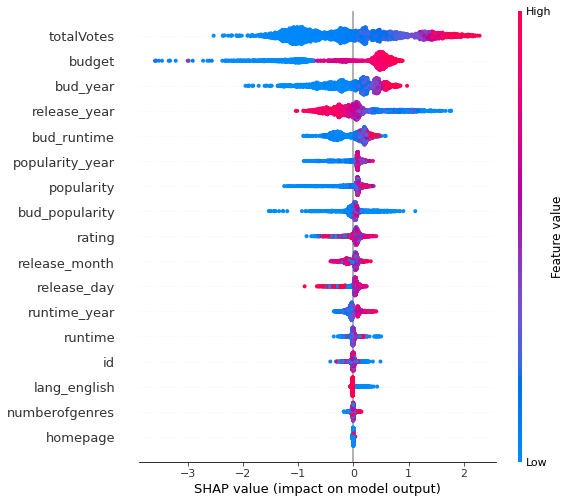

In [122]:
explainer = shap.TreeExplainer(lgb_model, X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

**It gives us the best features suitable for this model**

# **Conclusion**

**After running multiple models we can conclude that the best score we get is thorugh LGBM model which is 2.001**

**Which gives us the Final score as 1.86 after submitting in the competition**

# **References**


1.   https://www.kaggle.com/harshvr15/datawrang-eda-models-lr-rf-xgb-lgb-gridsearch
2.   Refered Towards Data Science
3.   https://scikit-learn.org/stable/modules/preprocessing.html


The Kaggle was used to get the dataset and referred the given kernel. Towards data science to learn about preprocessing and cleaning. Scikit learn used to learn about various models. Ihave tried to train some models through appying my own hyper parameters.

Copyright 2021 Ronak Bhushan Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE